In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import os
import numpy as np

from utils.calibrator import CameraParam, generate_object_points

In [58]:
rootDir = "/data/j/zhen_egocentric_pose/capture/Capture_11-15-18_2"
serial_str = ["Kinect01", "Kinect02", "Kinect03","Kinect04","Kinect05","Kinect09"]
imgNamePre = ["img", "img", "img", "img", "img", "img", "img", "img", "img", "img"]

num_cam = 6

checkerboardImgDir = os.path.join(rootDir, "SyncData")
camparamDir = os.path.join(checkerboardImgDir, "output")
camparamTmpDir = os.path.join(checkerboardImgDir, "tmpdata")

cameras_param = [CameraParam() for i in range(num_cam)]
for cam_idx in range(num_cam):
    camDirName = serial_str[cam_idx]
    calib_file_name = os.path.join(camparamDir, "calib_{}.txt".format(camDirName))
    cameras_param[cam_idx].read_calibration(calib_file_name)

    
    
camparamDir = os.path.join(checkerboardImgDir, "output_helen")
cameras_param2 = [CameraParam() for i in range(num_cam)]
for cam_idx in range(num_cam):
    camDirName = serial_str[cam_idx]
    calib_file_name = os.path.join(camparamDir, "calib_{}.txt".format(camDirName))
    cameras_param2[cam_idx].read_calibration(calib_file_name)


camparamTmpDir = os.path.join(checkerboardImgDir, "tmpdata")
cameras_param3 = [CameraParam() for i in range(num_cam)]
for cam_idx in range(num_cam):
    camDirName = serial_str[cam_idx]
    calib_file_name = os.path.join(camparamTmpDir, "calib_{}_1.txt".format(camDirName))
    cameras_param3[cam_idx].read_calibration(calib_file_name)


In [60]:
dist = 4.0
camera_points = np.array([[0, 0, 0], 
                          [ dist,  dist, dist*2], [ dist, -dist, dist*2],
                          [-dist, -dist, dist*2], [-dist,  dist, dist*2]]).T
camera_connections = [[0, 1], [0, 2], [0, 3], [0, 4], [1, 2], [2, 3], [3, 4], [4, 1]]

In [40]:
checkboard_size_width = 7
checkboard_size_height = 6
cell_width = 8.99286
cell_height = 8.99286

# checkboard = generate_object_points(1, checkboard_size_width, checkboard_size_height, cell_width, cell_height)[0].T
x, y = np.meshgrid(range(0, checkboard_size_height),range(0,checkboard_size_width))
x = cell_width * x.astype(np.float)
y = cell_height * y.astype(np.float)
z = np.zeros((checkboard_size_width, checkboard_size_height))

<IPython.core.display.Javascript object>


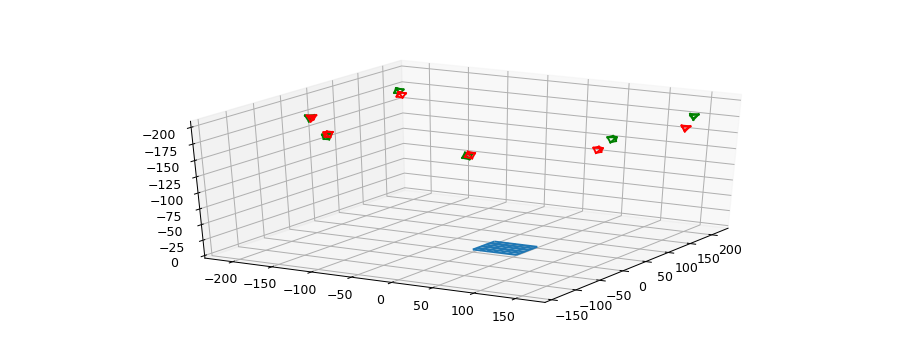

In [62]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111, projection='3d')

for cam_idx in range(num_cam):
    camparam = cameras_param[cam_idx]
    X = np.dot(camparam.R.T, (camera_points - camparam.t))
    
    # print X
    for connection in camera_connections:
        ax.plot(*X[:, connection], c='g') 

for cam_idx in range(num_cam):
    camparam = cameras_param2[cam_idx]
    X = np.dot(camparam.R.T, (camera_points - camparam.t))
    
    # print X
    for connection in camera_connections:
        ax.plot(*X[:, connection], c='r')  # lw=0.5
        
# for cam_idx in range(num_cam):
#     camparam = cameras_param3[cam_idx]
#     X = np.dot(camparam.R.T, (camera_points - camparam.t))
    
#     # print X
#     for connection in camera_connections:
#         ax.plot(*X[:, connection], c='m')  # lw=0.5

ax.plot_wireframe(x, y, z)



In [57]:
print cameras_param3[0]

Image Size: 0 x 0
Intrinsics Matrix: None
Distortion: None
Extrinsics Rotation : None
Extrinsics Translation : None

